In [6]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import warnings
from feature_engineering import *
warnings.filterwarnings('ignore')
PI = np.pi
%matplotlib inline

In [2]:
# assume X_train and y_train are the training data and labels respectively
df = pd.read_csv("../data/dataset1.csv")
df.head(-1)
df=df.drop('id',axis=1)
mean = np.mean(df, axis=0)
for i in range(1, df.shape[1]):
    df.iloc[:, i].fillna(mean[i-1], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df, shuffle = False)

In [3]:
# build the FLDM model
fldm = LinearDiscriminantAnalysis(n_components=1)
fldm.fit(X_train, y_train)

# project the training data onto the 1-dimensional FLDM space
X_train_lda = fldm.transform(X_train)

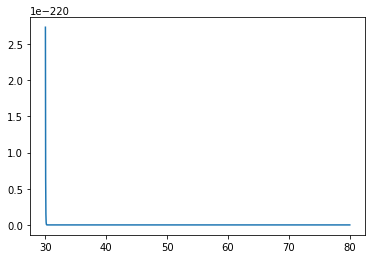

In [10]:
# find the decision boundary in the 1-dimensional FLDM space
mean_pos = np.mean(X_train_lda[y_train == 1])
mean_neg = np.mean(X_train_lda[y_train == -1])
std_pos = np.std(X_train_lda[y_train == 1])
std_neg = np.std(X_train_lda[y_train == -1])

threshold = (mean_pos + mean_neg) / 2

x = np.linspace(30, 80, 10000)
y1 = 1/(std_pos*np.sqrt(2*PI)) * np.exp(-(x-mean_pos)**2 / 2*std_pos**2)
plt.plot(x, y1)
# assume X_test and y_test are the testing data and labels respectively

In [5]:
# project the testing data onto the 1-dimensional FLDM space

X_test_lda = fldm.transform(X_test)

# evaluate the performance of the model on the testing data
y_pred = np.where(X_test_lda > threshold, 1, -1)
evaluate(y_test, y_pred)

Confusion Matrix: {'true_positive': 41, 'true_negative': 142, 'false_positive': 3, 'false_negative': 2}
Accuracy: 97.34042553191489%
Precision: 93.18181818181819%
Recall: 95.34883720930233%


97.34042553191489